<a href="https://colab.research.google.com/github/Saifullah785/machine-learning-engineer-roadmap/blob/main/Lecture_64_Bagging_Ensemble_Classifiers_%26_Regression/lecture_64_bagging_learning_tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **bagging_learning_tool**

In [81]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
# Load the iris dataset
df = pd.read_csv('iris.csv')
# Display the first 5 rows of the dataframe
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
# Display the shape of the dataframe (number of rows and columns)
df.shape

(150, 6)

In [84]:
# Select all columns except the first one (assuming the first column is 'Id')
df = df.iloc[:,1:]

In [85]:
# Display the entire dataframe
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [86]:
# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()
# Encode the 'Species' column to convert categorical labels into numerical ones
df['Species'] = le.fit_transform(df['Species'])

In [87]:
# Display the first 5 rows of the dataframe after encoding the 'Species' column
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
# Display the shape of the dataframe after encoding the 'Species' column
df.shape

(150, 5)

In [89]:
# Filter the dataframe to include only rows where 'Species' is not 0
# Select 'SepalWidthCm', 'PetalLengthCm', and 'Species' columns
df = df[df['Species'] != 0][['SepalWidthCm', 'PetalLengthCm','Species']]

In [90]:
# Display the first 5 rows of the filtered dataframe
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [91]:
# Display the shape of the filtered dataframe
df.shape

(100, 3)

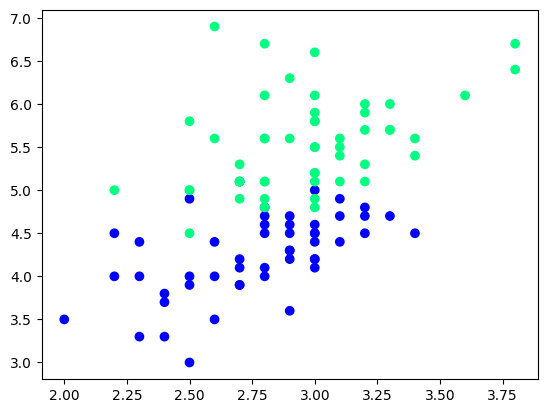

In [92]:
# Create a scatter plot of 'SepalWidthCm' vs 'PetalLengthCm'
# Color the points based on the 'Species' column using the 'winter' colormap
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'],c=df['Species'], cmap='winter')

In [93]:
# Taking only 100 rows from the filtered dataframe and shuffle them
df = df.sample(100)

# Split the shuffled dataframe into training, validation, and testing sets
# Select 10 samples for training with replacement
df_train = df.iloc[:60, :].sample(10)
# Select 5 samples for validation
df_val = df.iloc[60:80, :].sample(5)
# Select 5 samples for testing
df_test = df.iloc[80:, :].sample(5)

In [94]:
# Display the training dataframe
df_train

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
57,2.4,3.3,1
60,2.0,3.5,1
131,3.8,6.4,2
136,3.4,5.6,2
134,2.6,5.6,2
109,3.6,6.1,2
75,3.0,4.4,1
107,2.9,6.3,2
88,3.0,4.1,1


In [95]:
# Display the validation dataframe
df_val

,SepalWidthCm,PetalLengthCm,Species
126,2.8,4.8,2
122,2.8,6.7,2
108,2.5,5.8,2
56,3.3,4.7,1
91,3.0,4.6,1


In [96]:
# Display the testing dataframe
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
77,3.0,5.0,1
104,3.0,5.8,2
71,2.8,4.0,1
72,2.5,4.9,1


In [97]:
# Extract features (X_test) and target (y_test) from the validation set
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [98]:
# Display the features of the validation set
X_test

array([[2.8, 4.8],
       [2.8, 6.7],
       [2.5, 5.8],
       [3.3, 4.7],
       [3. , 4.6]])

In [99]:
# Display the target of the validation set
y_test

array([2, 2, 2, 1, 1])

# **Case 1 - Bagging**

In [100]:
# Data for Tree 1
# Sample 8 data points with replacement from the training set for the first bag
df_bag = df_train.sample(8, replace=True)

# Extract features (X) and target (y) from the bagged data
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

# Display the bagged data for Tree 1
df_bag

,SepalWidthCm,PetalLengthCm,Species
131,3.8,6.4,2
107,2.9,6.3,2
148,3.4,5.4,2
134,2.6,5.6,2
136,3.4,5.6,2
75,3.0,4.4,1
107,2.9,6.3,2
134,2.6,5.6,2


In [101]:
# Import DecisionTreeClassifier for building decision trees
from sklearn.tree import DecisionTreeClassifier
# Import plot_tree for visualizing decision trees
from sklearn.tree import plot_tree

# Import plot_decision_regions for visualizing decision boundaries
from mlxtend.plotting import plot_decision_regions
# Import accuracy_score for evaluating model performance
from sklearn.metrics import accuracy_score

In [102]:
# Create a DecisionTreeClassifier object for the first bag
dt_bag1 = DecisionTreeClassifier()

In [103]:
# Define a function to evaluate a classifier
def evaluate(clf, X,y):
  # Train the classifier on the given data
  clf.fit(X,y)
  # Plot the decision tree
  plot_tree(clf)
  # Show the plot
  plt.show()
  # Plot the decision regions
  plot_decision_regions(X.values, y.values, clf=clf, legend=2)
  # Predict on the test data
  y_pred = clf.predict(X_test)
  # Print the accuracy score
  print(accuracy_score(y_test, y_pred))

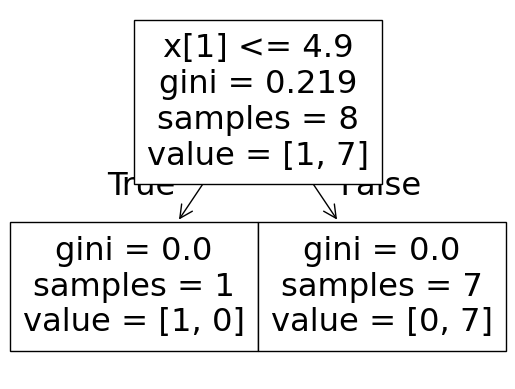

0.8


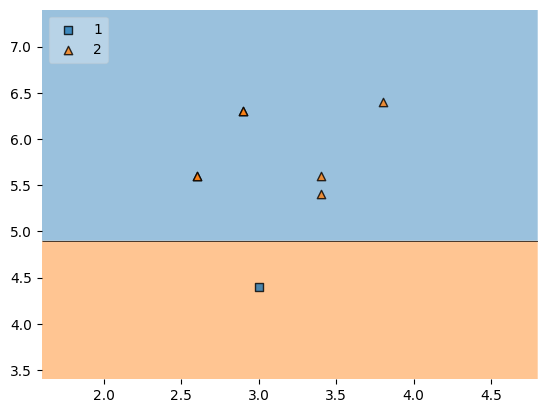

In [104]:
# Evaluate the first decision tree classifier using the bagged data
evaluate(dt_bag1,X,y)

In [105]:
# Data For Tree 2
# Sample 8 data points with replacement from the training set for the second bag
df_bag = df_train.sample(8, replace=True)

# Extract features (X) and target (y) from the bagged data
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

# Display the bagged data for Tree 2
df_bag

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
134,2.6,5.6,2
107,2.9,6.3,2
109,3.6,6.1,2
107,2.9,6.3,2
57,2.4,3.3,1
57,2.4,3.3,1
60,2.0,3.5,1


In [106]:
# Create a DecisionTreeClassifier object for the second bag
dt_bag2 = DecisionTreeClassifier()

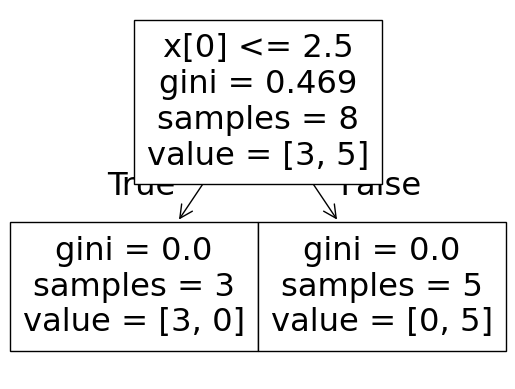

0.4


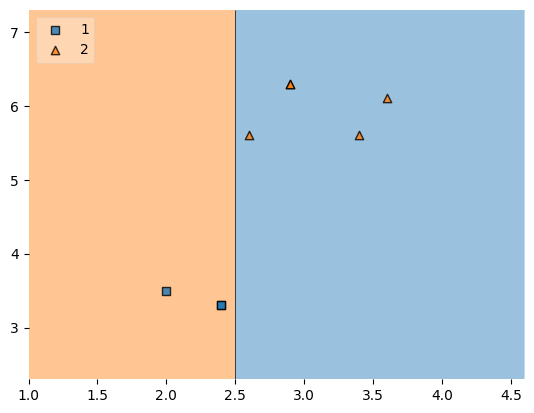

In [107]:
# Evaluate the second decision tree classifier using the bagged data
evaluate(dt_bag2,X,y)

In [108]:
# Data For Tree 3
# Sample 8 data points with replacement from the training set for the third bag
df_bag = df_train.sample(8, replace=True)

# Extract features (X) and target (y) from the bagged data
X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

# Display the bagged data for Tree 3
df_bag

,SepalWidthCm,PetalLengthCm,Species
107,2.9,6.3,2
75,3.0,4.4,1
148,3.4,5.4,2
136,3.4,5.6,2
88,3.0,4.1,1
60,2.0,3.5,1
57,2.4,3.3,1
131,3.8,6.4,2


In [109]:
# Create a DecisionTreeClassifier object for the third bag
dt_bag3 = DecisionTreeClassifier()

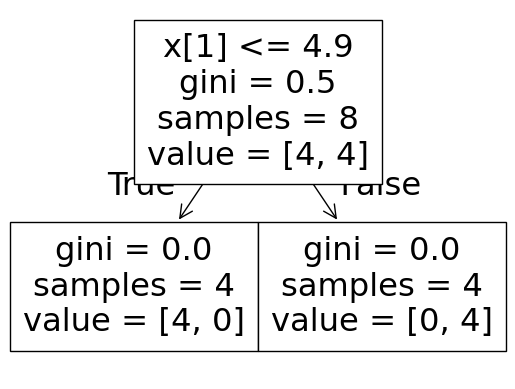

0.8


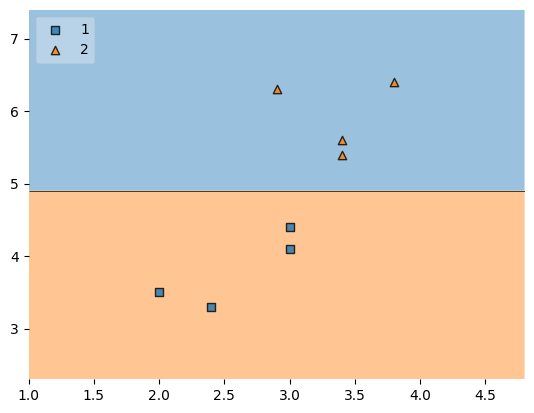

In [110]:
# Evaluate the third decision tree classifier using the bagged data
evaluate(dt_bag3,X,y)

# **Predict**

In [111]:
# Display the test dataframe
df_test

,SepalWidthCm,PetalLengthCm,Species
145,3.0,5.2,2
77,3.0,5.0,1
104,3.0,5.8,2
71,2.8,4.0,1
72,2.5,4.9,1


In [112]:
# Make predictions on a new data point [3.2, 4.7] using each of the three trained decision trees
print('Predictor 1',dt_bag1.predict(np.array([3.2,4.7]).reshape(1,2)))
print('Predictor 2',dt_bag2.predict(np.array([3.2,4.7]).reshape(1,2)))
print('Predictor 3',dt_bag3.predict(np.array([3.2,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [1]


# **Pasting**

In [113]:
# Display the training dataframe
df_train

,SepalWidthCm,PetalLengthCm,Species
148,3.4,5.4,2
57,2.4,3.3,1
60,2.0,3.5,1
131,3.8,6.4,2
136,3.4,5.6,2
134,2.6,5.6,2
109,3.6,6.1,2
75,3.0,4.4,1
107,2.9,6.3,2
88,3.0,4.1,1


In [114]:
# Sample 8 data points without replacement from the training dataframe (for pasting)
df_train.sample(8, replace=False)

,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
148,3.4,5.4,2
60,2.0,3.5,1
57,2.4,3.3,1
134,2.6,5.6,2
109,3.6,6.1,2
131,3.8,6.4,2
107,2.9,6.3,2


# **Random Subspaces**

In [115]:
# Load the iris dataset again
df1 = pd.read_csv('iris.csv')
# Sample 10 rows from the dataframe (for random subspaces)
df1 = df1.sample(10)

In [116]:
# Display the sampled dataframe (for random subspaces)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,138,6.4,3.1,5.5,1.8,Iris-virginica
125,126,7.2,3.2,6.0,1.8,Iris-virginica
120,121,6.9,3.2,5.7,2.3,Iris-virginica
5,6,5.4,3.9,1.7,0.4,Iris-setosa
145,146,6.7,3.0,5.2,2.3,Iris-virginica
126,127,6.2,2.8,4.8,1.8,Iris-virginica
100,101,6.3,3.3,6.0,2.5,Iris-virginica
27,28,5.2,3.5,1.5,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
93,94,5.0,2.3,3.3,1.0,Iris-versicolor


In [117]:
# Sample 2 columns with replacement from the dataframe (for random subspaces)
df1.sample(2, replace=True, axis=1)

,SepalWidthCm,SepalLengthCm
137,3.1,6.4
125,3.2,7.2
120,3.2,6.9
5,3.9,5.4
145,3.0,6.7
126,2.8,6.2
100,3.3,6.3
27,3.5,5.2
92,2.6,5.8
93,2.3,5.0


In [118]:
# First sample 8 rows with replacement, then sample 2 columns with replacement (combining bagging and random subspaces)
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,Species,PetalWidthCm
126,Iris-virginica,1.8
27,Iris-setosa,0.2
126,Iris-virginica,1.8
126,Iris-virginica,1.8
27,Iris-setosa,0.2
126,Iris-virginica,1.8
100,Iris-virginica,2.5
120,Iris-virginica,2.3
